<center>
    <u><h1> KSP2022 Selection- Problem Statement </u></h1>
    <h2> An attempt at a solution</h2>
</center>
<br>
<b>Name</b>: Chirag Verma <br>
<b>Institute</b>: Indian Institute of Technology, Roorkee <br>
<b>Course</b>: M.Sc. Physics - I year (completed) <br>


<b>Problem Statement</b>: <url>https://github.com/krittikaiitb/KSP2022-selection</url>

In [1]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import re
import math
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
# IMPORTING DATA

url = "https://raw.githubusercontent.com/krittikaiitb/KSP2022-selection/master/CepheidData.csv"
df = pd.read_csv(url)

In [3]:
# VERIFYING IMPORT

df.head()

,ID,RA,Decl,I,V,P_1
0,OGLE-SMC-CEP-0001,00:20:07.87,-74:32:54.6,17.314,17.897,1.128258
1,OGLE-SMC-CEP-0005,00:21:53.88,-72:22:22.7,17.196,17.768,1.287411
2,OGLE-SMC-CEP-0006,00:21:56.36,-73:54:55.9,17.120,17.770,1.484773
3,OGLE-SMC-CEP-0007,00:22:04.27,-73:26:55.2,17.124,-99.990,1.334199
4,OGLE-SMC-CEP-0009,00:22:25.60,-73:47:03.5,16.814,17.384,1.639233


In [11]:
# CLEANING DATA
# AIM: To remove entries having V or I = -99.990

temp = df

temp = temp.drop(df[(df.V == -99.990)].index)
temp = temp.drop(df[(df.I == -99.990)].index)
temp.reset_index(inplace=True, drop=True)

df_cleaned = temp

df_cleaned.head()

,ID,RA,Decl,I,V,P_1
0,OGLE-SMC-CEP-0001,00:20:07.87,-74:32:54.6,17.314,17.897,1.128258
1,OGLE-SMC-CEP-0005,00:21:53.88,-72:22:22.7,17.196,17.768,1.287411
2,OGLE-SMC-CEP-0006,00:21:56.36,-73:54:55.9,17.120,17.770,1.484773
3,OGLE-SMC-CEP-0009,00:22:25.60,-73:47:03.5,16.814,17.384,1.639233
4,OGLE-SMC-CEP-0010,00:22:29.29,-73:54:16.3,16.976,17.515,1.442611


In [13]:
# COORDINATES' UNIT CONVERSION
# AIM: i.  RA(HMS)   ->   RA(DD) 
#      ii. Decl(DMS) ->   Decl(DD)
#      where DD = Decimal Degrees

def hms2deg(h, m, s):
    return (15*float(h) + 15*float(m)/60+ 15*float(s)/3600)

def dms2deg(d, m, s):
    if(float(d) < 0):
        return (float(d) - float(m)/60 - float(s)/3600)
    else:
        return (float(d) + float(m)/60 + float(s)/3600)

temp = list(df_cleaned["RA"])
ra = []
for i in temp:
    ra_h, ra_m, ra_s = re.split('[::]', i)
    ra.append(hms2deg(ra_h, ra_m, ra_s))
df_cleaned["RA(DD)"] = ra

temp = list(df_cleaned["Decl"])
decl = []
for i in temp:
    decl_d, decl_m, decl_s = re.split('[::]', i)
    decl.append(dms2deg(decl_d, decl_m, decl_s))
df_cleaned["Decl(DD)"] = decl

In [14]:
# VERIFYING THE CONVERSION

df_cleaned.head()

,ID,RA,Decl,I,V,P_1,RA(DD),Decl(DD)
0,OGLE-SMC-CEP-0001,00:20:07.87,-74:32:54.6,17.314,17.897,1.128258,5.032792,-74.548500
1,OGLE-SMC-CEP-0005,00:21:53.88,-72:22:22.7,17.196,17.768,1.287411,5.474500,-72.372972
2,OGLE-SMC-CEP-0006,00:21:56.36,-73:54:55.9,17.120,17.770,1.484773,5.484833,-73.915528
3,OGLE-SMC-CEP-0009,00:22:25.60,-73:47:03.5,16.814,17.384,1.639233,5.606667,-73.784306
4,OGLE-SMC-CEP-0010,00:22:29.29,-73:54:16.3,16.976,17.515,1.442611,5.622042,-73.904528


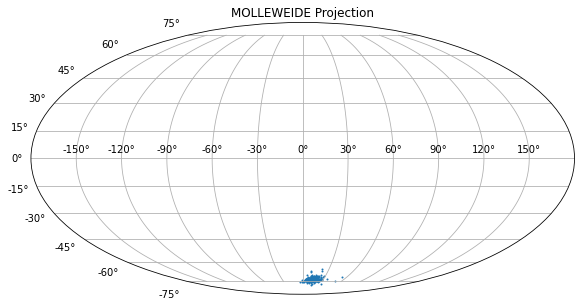

In [23]:
# PLOTTING RA AND DEC IN A A SKY GRID(MOLLWEIDE PROJECTION)
# AIM: i.  Convert RA and DEC to radians
#      ii. Plot

ra_rad = []
decl_rad = []

for i in ra:
    if (i > 180):
        temp = i - 360
        ra_rad.append(math.radians(temp))
    elif (i < 180):
        ra_rad.append(math.radians(i))

for i in decl:
    decl_rad.append(math.radians(i))
    
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra_rad, decl_rad, s=1)
plt.title("MOLLEWEIDE Projection")
ax.grid(True)
    


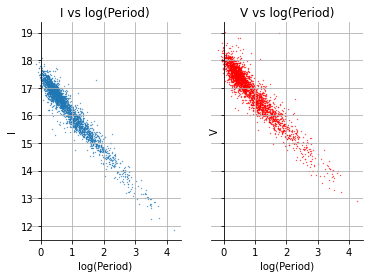

In [29]:
# PLOTTING MAGNITUDE (V OR I) WRT LOG(PERIOD)

I = list(df_cleaned["I"])
V = list(df_cleaned["V"])
period = list(df_cleaned["P_1"])

log_period = []

for i in period:
    log_period.append(math.log(i))
    
fig, axs = plt.subplots(1, 2, sharey=True)

axs[0].scatter(log_period, I, s=0.1)
axs[0].grid(True)
axs[0].set(xlabel='log(Period)', ylabel='I', title='I vs log(Period)')
axs[0].spines['left'].set_position('zero')
axs[0].spines['right'].set_color('none')
axs[0].spines['top'].set_color('none')

axs[1].scatter(log_period, V, s=0.1, color="r")
axs[1].set(xlabel='log(Period)', ylabel='V', title='V vs log(Period)')
axs[1].grid(True)
axs[1].spines['left'].set_position('zero')
axs[1].spines['right'].set_color('none')
axs[1].spines['top'].set_color('none')

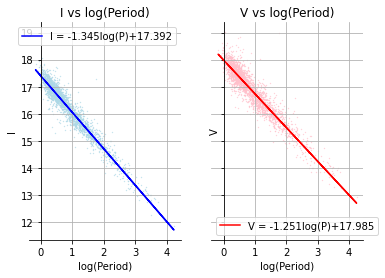

In [40]:
# CURVE FITTING

def objective(x, m, c):
    return (m*x + c)

# For I band

xdata = np.array(log_period)
ydata = np.array(I)
p_opt, p_cov = curve_fit(objective, xdata, ydata)

fig, axs = plt.subplots(1, 2, sharey = True)

axs[0].scatter(xdata, ydata, s=0.1, color='lightblue')
axs[0].plot(xdata, objective(xdata,*p_opt), color='b', label = "I = " + str(round(p_opt[0], 3)) + "log(P)+" + str(round(p_opt[1], 3)))
axs[0].legend(loc='best')
axs[0].grid(True)
axs[0].set(xlabel='log(Period)', ylabel='I', title='I vs log(Period)')
axs[0].spines['left'].set_position('zero')
axs[0].spines['right'].set_color('none')
axs[0].spines['top'].set_color('none')

# STORING GLOBAL INTERCEPTS FOR FUTURE USE
global_intercept_I = p_opt[1]

# For V band

ydata = np.array(V)
p_opt, p_cov = curve_fit(objective, xdata, ydata)

axs[1].scatter(xdata, ydata, s=0.1, color='pink')
axs[1].plot(xdata, objective(xdata,*p_opt), color='r', label = "V = " + str(round(p_opt[0], 3)) + "log(P)+" + str(round(p_opt[1], 3)))
axs[1].legend(loc='best')
axs[1].grid(True)
axs[1].set(xlabel='log(Period)', ylabel='V', title='V vs log(Period)')
axs[1].spines['left'].set_position('zero')
axs[1].spines['right'].set_color('none')
axs[1].spines['top'].set_color('none')

# STORING GLOBAL INTERCEPTS FOR FUTURE USE
global_intercept_V = p_opt[1]

In [45]:
# CALCULATING DEVIATION
# AIM: i.   Calculating upper and lower bounds for RA and DEC using Confidence interval estimation i.e. 95% Cl ~ 2 SD
#      ii.  Removing the outliers
#      iii. Plotting with and without outliers for comparison
#      iv.  Finding quantiles to segregate the data
#      v.   Plotting with quantiles and without outliers
#      vi.  Calculating and plotting deviation as a histogram


# i. Upper and lower bounds for RA, DEC

upper_ra = df_cleaned["RA(DD)"].mean() + 2*df_cleaned["RA(DD)"].std()
lower_ra = df_cleaned["RA(DD)"].mean() - 2*df_cleaned["RA(DD)"].std()

upper_decl = df_cleaned["Decl(DD)"].mean() + 2*df_cleaned["Decl(DD)"].std()
lower_decl = df_cleaned["Decl(DD)"].mean() - 2*df_cleaned["Decl(DD)"].std()

# ii. Removing outliers

temp = df_cleaned[(df_cleaned["RA(DD)"] < upper_ra) & (df_cleaned["RA(DD)"] > lower_ra)]
temp = temp[(temp["Decl(DD)"] < upper_decl) & (temp["Decl(DD)"] > lower_decl)]
temp.reset_index(inplace=True, drop=True)

df_wo_outliers = temp

In [46]:
# Checking outliers' removal

df_wo_outliers.describe()

,I,V,P_1,RA(DD),Decl(DD)
count,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000
mean,16.212832,16.891104,3.273272,13.828864,-73.008181
std,0.931043,0.887702,4.121664,3.072780,0.620666
min,11.853000,12.916000,0.841853,3.484958,-74.556417
25%,15.675000,16.366750,1.486928,12.058115,-73.409750
50%,16.480500,17.119000,1.950096,13.701833,-73.067236
75%,16.886250,17.530500,3.369107,15.778031,-72.643694
max,18.070000,19.015000,68.987498,35.206083,-71.406833


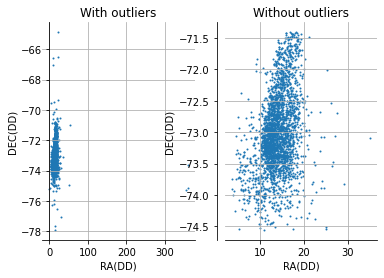

In [56]:
# iii. Plotting with and without outliers

fig, axs = plt.subplots(1, 2)
axs[0].scatter(df_cleaned["RA(DD)"], df_cleaned["Decl(DD)"], s=1)
axs[0].set(xlabel="RA(DD)", ylabel="DEC(DD)", title="With outliers")
axs[0].spines['left'].set_position('zero')
axs[0].spines['right'].set_color('none')
axs[0].spines['top'].set_color('none')
axs[0].grid(True)

axs[1].scatter(df_wo_outliers["RA(DD)"], df_wo_outliers["Decl(DD)"], s=1)
axs[1].set(xlabel="RA(DD)", ylabel="DEC(DD)", title="Without outliers")
axs[1].spines['left'].set_position('zero')
axs[1].spines['right'].set_color('none')
axs[1].spines['top'].set_color('none')
axs[1].grid(True)


In [61]:
# iv. Finding quantiles 
#     20 percentile divisions for 5 divisions

quantile_ra = np.zeros(5)
quantile_decl = np.zeros(5)

for i in range(5):
        quantile_ra[i] = np.quantile(np.sort(np.array(df_wo_outliers["RA(DD)"])), 0.20*(i+1))
        quantile_decl[i] = np.quantile(np.sort(np.array(df_wo_outliers["Decl(DD)"])), 0.20*(i+1))


In [62]:
print(quantile_ra)
print(quantile_decl)


[11.64433333 13.00335833 14.4353     16.28056667 35.20608333]
[-73.49922222 -73.20417778 -72.93022778 -72.51592222 -71.40683333]


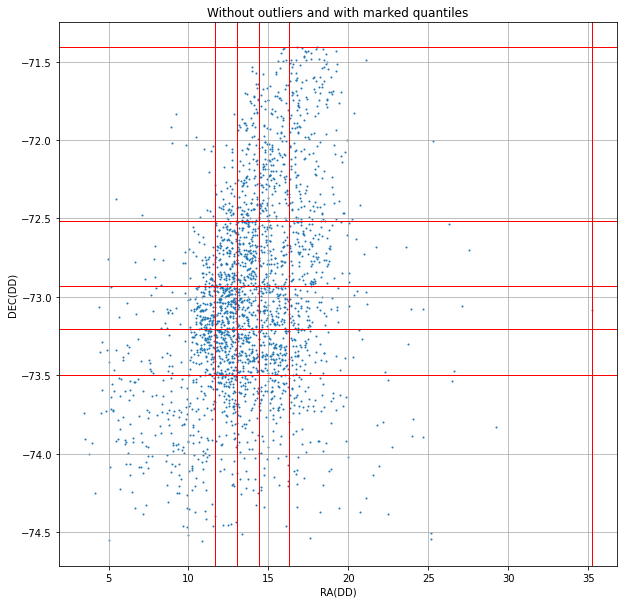

In [64]:
# v. Plotting with quantiles

fig = plt.figure(figsize=(10, 10))
axs = fig.add_subplot(111)
axs.scatter(np.array(df_wo_outliers["RA(DD)"]), np.array(df_wo_outliers["Decl(DD)"]), s = 1)
for i in range(5):
    plt.axhline(y = quantile_decl[i], color='r', linewidth=1)
    plt.axvline(x = quantile_ra[i], color='r', linewidth=1)
axs.set(xlabel="RA(DD)", ylabel="DEC(DD)", title="Without outliers and with marked quantiles")
axs.grid(True)


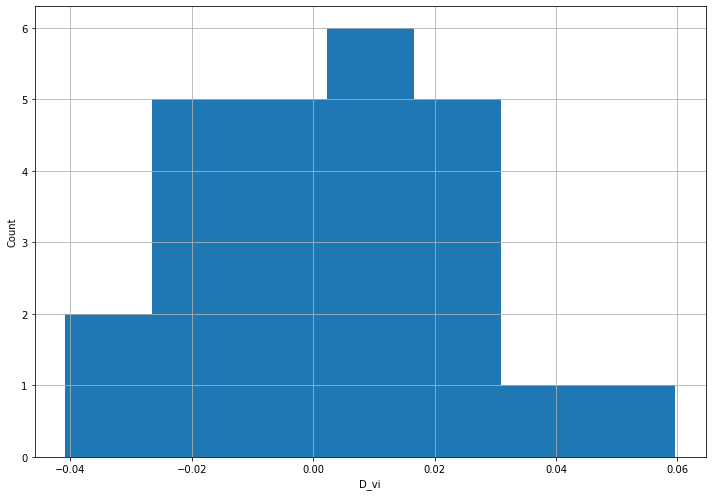

In [93]:
# vi. Calculating Deviation

# Recording all global and local bounds for RA and DEC

bounds_ra = [df_wo_outliers["RA(DD)"].min()]
for i in list(quantile_ra):
    bounds_ra.append(i)
    
bounds_decl = [df_wo_outliers["Decl(DD)"].min()]
for i in list(quantile_decl):
    bounds_decl.append(i)

# Optimised values of intercepts for each patch for I and V bands respectively
opt_i = []
opt_v = []

for i in range(5):
    temp = df_wo_outliers[(df_wo_outliers["RA(DD)"] < bounds_ra[i+1]) & (df_wo_outliers["RA(DD)"] > bounds_ra[i])]
    for j in range(5):
        df_patch = temp[(temp["Decl(DD)"] < bounds_decl[j+1]) & (temp["Decl(DD)"] > bounds_decl[j])]
        
        period = list(df_patch["P_1"])
        log_period = []
        for k in period:
            log_period.append(math.log(k))
            
        xdata = np.array(log_period)
        ydata_i = np.array(df_patch["I"])
        ydata_v = np.array(df_patch["V"])
        p_opt_i = curve_fit(objective, xdata, ydata_i)
        p_opt_v = curve_fit(objective, xdata, ydata_v)
        
        opt_i.append(p_opt_i[0][1])
        opt_v.append(p_opt_v[0][1])

# Measuring the deviation

D_vi = []


for i in range(25):
    temp = (opt_v[i] - global_intercept_V) - (opt_i[i] - global_intercept_I)
    D_vi.append(temp)
    
# Plotting the deviation

fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
axs.hist(D_vi, bins = 7)
plt.xlabel("D_vi")
plt.ylabel("Count")
axs.grid(True)

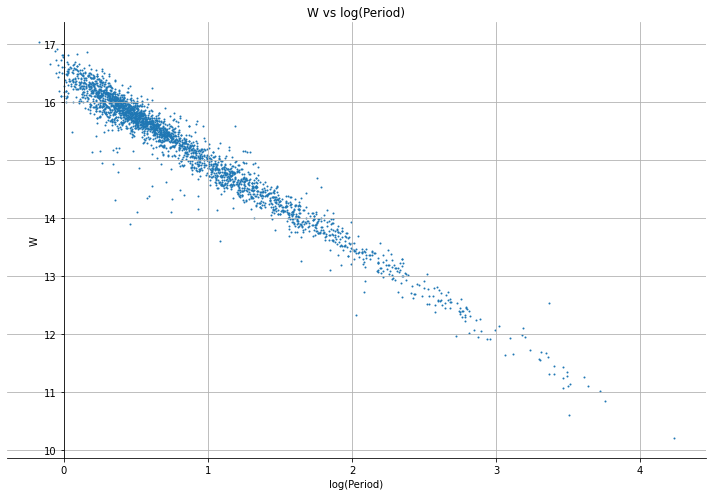

In [97]:
# COMPUTING WESENHET INDEX

I = np.array(df_cleaned["I"])
V = np.array(df_cleaned["V"])

period = list(df_cleaned["P_1"])
log_period = []

for index in period:
    log_period.append(math.log(index))

W = (I - 1.55* np.subtract(V, I))

fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
axs.scatter(log_period, W, s=1)
axs.grid(True)
axs.set(xlabel='log(Period)', ylabel='W', title='W vs log(Period)')
axs.spines['left'].set_position('zero')
axs.spines['right'].set_color('none')
axs.spines['top'].set_color('none')



